In [36]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

Combine the csv file of all Clustered color profile and video metrics using the Video ID 

In [49]:
# Combine all Cluster data and color profile percentage into one DataFrame
color_profile_data = pd.read_csv('Final_Clustering/K=9/Cluster_Color_Profile_Final.csv')

# Load video engagement data
video_data = pd.read_csv('Final_Clustering/Results_Count_Final.csv')

Get rid of the '.jpg' in the video ID in Clustered Color Profile

In [50]:
# Remove the .jpg extension from the VideoID in color_profile_data
color_profile_data['VideoID'] = color_profile_data['VideoID'].str.replace('.jpg', '')

# Check again after cleaning
print("\nCleaned Sample IDs from color_profile_data:")
print(color_profile_data['VideoID'].head())


Cleaned Sample IDs from color_profile_data:
0    --8n6A8Q6M0
1    -0FfyNZdHk0
2    -1B7cVoZr1c
3    -4yu_13EHFM
4    -6FvAU9H98w
Name: VideoID, dtype: object


In [51]:
# Display the first few rows of both datasets
print("\nClustered Color Profile Data:")
print(color_profile_data.head())
print("\nNumber of rows and columns in text_data:", color_profile_data.shape)

print("\nVideo Engagement Data:")
print(video_data.head())
print("\nNumber of rows and columns in video_data:", video_data.shape)


Clustered Color Profile Data:
       VideoID  Yellow  Orange  Red  Violet  Blue  Green  Black  White  Brown  \
0  --8n6A8Q6M0    0.00    0.71  0.0   23.29  0.06   0.00  13.58  13.01  49.35   
1  -0FfyNZdHk0    0.01    0.97  0.0   11.65  0.00   8.13  26.25  13.26  39.73   
2  -1B7cVoZr1c    0.84    0.61  0.0   16.56  7.08   0.00  14.65  32.05  28.21   
3  -4yu_13EHFM    0.00    8.72  0.0   25.99  0.00   0.00  14.83  10.53  39.93   
4  -6FvAU9H98w    0.11   10.24  0.7    6.79  0.04   0.00  12.74  39.01  30.37   

   Cluster  
0        1  
1        5  
2        2  
3        1  
4        2  

Number of rows and columns in text_data: (2587, 11)

Video Engagement Data:
       VideoID  View Count  Like Count  Comment Count
0  --8n6A8Q6M0      338385       11044           1371
1  -0FfyNZdHk0         147           4              1
2  -1B7cVoZr1c      150876        3011            225
3  -4yu_13EHFM       28277        1158            381
4  -6FvAU9H98w       63409        1277            110

Nu

In [52]:
# Merge datasets on 'Video ID'
merged_data = pd.merge(color_profile_data, video_data, on='VideoID', how='inner')

# Read the results_final.csv file
results_df = pd.read_csv('results_final.csv')

# Rename the 'Video Id' column to 'VideoID' in results_df to match merged_data
results_df = results_df.rename(columns={'Video Id': 'VideoID'})

# Merge the Channel Title from results_df into merged_data
merged_data = pd.merge(merged_data, results_df[['VideoID', 'Channel Title']], on='VideoID', how='inner')


# Check the merged dataset
print("\nMerged Dataset:")
print(merged_data.head())

# Display the number of rows and columns
print("\nNumber of rows and columns:", merged_data.shape)


Merged Dataset:
       VideoID  Yellow  Orange  Red  Violet  Blue  Green  Black  White  Brown  \
0  --8n6A8Q6M0    0.00    0.71  0.0   23.29  0.06   0.00  13.58  13.01  49.35   
1  -0FfyNZdHk0    0.01    0.97  0.0   11.65  0.00   8.13  26.25  13.26  39.73   
2  -1B7cVoZr1c    0.84    0.61  0.0   16.56  7.08   0.00  14.65  32.05  28.21   
3  -4yu_13EHFM    0.00    8.72  0.0   25.99  0.00   0.00  14.83  10.53  39.93   
4  -6FvAU9H98w    0.11   10.24  0.7    6.79  0.04   0.00  12.74  39.01  30.37   

   Cluster  View Count  Like Count  Comment Count            Channel Title  
0        1      338385       11044           1371  Travel with Luke Damant  
1        5         147           4              1        Learn with Daryll  
2        2      150876        3011            225      Combat Arms Channel  
3        1       28277        1158            381         Chasing Kimberly  
4        2       63409        1277            110          Paolo fromTOKYO  

Number of rows and columns: (2568

Check the number of channels per cluster, to see the difference on each channel

In [53]:
# Group by Cluster and Channel Title, then count videos
cluster_channel_counts = merged_data.groupby(['Cluster', 'Channel Title']).size().reset_index(name='Video Count')

# Sort by Cluster and Video Count in descending order
cluster_channel_counts = cluster_channel_counts.sort_values(['Cluster', 'Video Count'], ascending=[True, False])

# Create a list to store the top 10 channels per cluster
top_channels = []

# Get top 10 channels for each cluster
for cluster in sorted(cluster_channel_counts['Cluster'].unique()):
    # Get top 10 channels for this cluster
    cluster_data = cluster_channel_counts[cluster_channel_counts['Cluster'] == cluster].nlargest(10, 'Video Count')
    
    # Add cluster header
    top_channels.append({
        'Cluster': f"Cluster {cluster}",
        'Channel': '---',
        'Video Count': '---'
    })
    
    # Add top 10 channels
    for _, row in cluster_data.iterrows():
        top_channels.append({
            'Cluster': '',
            'Channel': row['Channel Title'],
            'Video Count': row['Video Count']
        })

# Create DataFrame from formatted results
result_df = pd.DataFrame(top_channels)

# Save to CSV
result_df.to_csv('Final_clustering/K=9/Correlational/top_channels_per_cluster.csv', index=False)

# Print the results
print("\nTop 10 channels per cluster:")
for cluster in sorted(cluster_channel_counts['Cluster'].unique()):
    cluster_data = cluster_channel_counts[cluster_channel_counts['Cluster'] == cluster].nlargest(10, 'Video Count')
    print(f"\nCluster {cluster}:")
    for _, row in cluster_data.iterrows():
        print(f"Channel: {row['Channel Title']} - Videos: {row['Video Count']}")


Top 10 channels per cluster:

Cluster 0:
Channel: Music Game News - Videos: 24
Channel: Nic & Rei - Videos: 18
Channel: Pinoy Planet - Videos: 12
Channel: Adam and Jane's Lifestyle - Videos: 6
Channel: KIM n LEE - Videos: 6
Channel: Waleska Herrera - Videos: 6
Channel: Beryl Shereshewsky - Videos: 5
Channel: FoodieMommaPH - Videos: 5
Channel: People Vs Food - Videos: 5
Channel: Big Guy Appetite - Videos: 4

Cluster 1:
Channel: Waleska Herrera - Videos: 70
Channel: Adam and Jane's Lifestyle - Videos: 32
Channel: The Commodity - Videos: 22
Channel: Pinoy Planet - Videos: 17
Channel: The Demouchets REACT - Videos: 16
Channel: TPL Bianca - Videos: 15
Channel: Justin & Alina - Videos: 13
Channel: Ken Abroad - Videos: 13
Channel: Aaron Around - Videos: 10
Channel: VI3ION - Videos: 10

Cluster 2:
Channel: Japapino World ジャパピーノ - Videos: 10
Channel: Pinoy Planet - Videos: 8
Channel: JUICY REACTS - Videos: 7
Channel: Nic & Rei - Videos: 7
Channel: Paolo fromTOKYO - Videos: 7
Channel: Waleska H

Get the Channel weight of each

In [54]:
# Calculate channel frequencies across the entire dataset
channel_frequencies = merged_data.groupby('Channel Title').size()
total_videos = len(merged_data)

# Calculate weights (inverse of frequency)
# Add 1 to avoid division by zero and smooth the weights
channel_weights = 1 / (channel_frequencies + 1)

# Normalize weights to sum to 1
channel_weights = channel_weights / channel_weights.sum()

# Create a copy of the original data
weighted_data = merged_data.copy()

# Add weights to the dataset
weighted_data['Channel_Weight'] = weighted_data['Channel Title'].map(channel_weights)

# Print some statistics about the weights
print("\nChannel Weight Statistics:")
print("------------------------")
print(f"Number of unique channels: {len(channel_weights)}")
print(f"Minimum weight: {channel_weights.min():.6f}")
print(f"Maximum weight: {channel_weights.max():.6f}")
print(f"Mean weight: {channel_weights.mean():.6f}")

# Show example of weights for some channels
print("\nExample Channel Weights:")
print("----------------------")
example_channels = channel_weights.nlargest(5).index.tolist() + channel_weights.nsmallest(5).index.tolist()
for channel in example_channels:
    print(f"{channel}:")
    print(f"  Frequency: {channel_frequencies[channel]} videos")
    print(f"  Weight: {channel_weights[channel]:.6f}")

# Calculate weighted statistics for numeric columns
numeric_columns = weighted_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['Cluster', 'Channel_Weight']]

# Calculate weighted means for each cluster
weighted_cluster_stats = []
for cluster in sorted(weighted_data['Cluster'].unique()):
    cluster_data = weighted_data[weighted_data['Cluster'] == cluster]
    
    # Calculate weighted statistics
    weighted_stats = {
        'Cluster': cluster,
        'Total_Videos': len(cluster_data),
        'Unique_Channels': len(cluster_data['Channel Title'].unique())
    }
    
    # Calculate weighted means for each numeric column
    for column in numeric_columns:
        weighted_mean = np.average(cluster_data[column], weights=cluster_data['Channel_Weight'])
        weighted_stats[f'Weighted_Mean_{column}'] = weighted_mean
    
    weighted_cluster_stats.append(weighted_stats)

# Convert to DataFrame
weighted_stats_df = pd.DataFrame(weighted_cluster_stats)

# Save the weighted dataset and statistics
weighted_data.to_csv('Final_clustering/K=9/Correlational/channel_weighted_data.csv', index=False)
weighted_stats_df.to_csv('Final_clustering/K=9/Correlational/weighted_cluster_statistics.csv', index=False)

# Print weighted cluster statistics
print("\nWeighted Cluster Statistics:")
print("--------------------------")
print(weighted_stats_df)

# Optional: Create a visualization of the weights distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(channel_weights, bins=50)
plt.title('Distribution of Channel Weights')
plt.xlabel('Weight')
plt.ylabel('Number of Channels')
plt.savefig('Final_clustering/K=9/Correlational/channel_weights_distribution.png')
plt.close()

# Print summary of the weighted analysis
print("\nSummary of Weighted Analysis:")
print("---------------------------")
print(f"Total videos analyzed: {len(weighted_data)}")
print(f"Total unique channels: {len(channel_weights)}")
print(f"Average videos per channel: {channel_frequencies.mean():.2f}")
print(f"Median videos per channel: {channel_frequencies.median():.2f}")
print(f"Maximum videos per channel: {channel_frequencies.max()}")
print(f"Minimum videos per channel: {channel_frequencies.min()}")


Channel Weight Statistics:
------------------------
Number of unique channels: 694
Minimum weight: 0.000028
Maximum weight: 0.002090
Mean weight: 0.001441

Example Channel Weights:
----------------------
10 Tampa Bay:
  Frequency: 1 videos
  Weight: 0.002090
1000 Nomads:
  Frequency: 1 videos
  Weight: 0.002090
1001 Trips - #1001Trips:
  Frequency: 1 videos
  Weight: 0.002090
A Brit in the Philippines:
  Frequency: 1 videos
  Weight: 0.002090
A Kids Perspective:
  Frequency: 1 videos
  Weight: 0.002090
Waleska Herrera:
  Frequency: 151 videos
  Weight: 0.000028
Pinoy Planet:
  Frequency: 89 videos
  Weight: 0.000046
The Commodity:
  Frequency: 51 videos
  Weight: 0.000080
TriFate Geo:
  Frequency: 50 videos
  Weight: 0.000082
Adam and Jane's Lifestyle:
  Frequency: 47 videos
  Weight: 0.000087

Weighted Cluster Statistics:
--------------------------
   Cluster  Total_Videos  Unique_Channels  Weighted_Mean_Yellow  \
0        0           261              131              1.261131   
1  

## ANOVA

Collect Metric Data by Cluster

In [55]:
# Define which video metric columns to analyze
metric_columns_for_anova = ['View Count', 'Like Count', 'Comment Count']
print(f"Metrics selected for analysis: {', '.join(metric_columns_for_anova)}")

Metrics selected for analysis: View Count, Like Count, Comment Count


In [56]:
# Create a dictionary to store ANOVA results
anova_results = {}

# Display information about Clusters
Cluster_sizes = weighted_data['Cluster'].value_counts().sort_index()
Cluster_channel_counts = weighted_data.groupby('Cluster')['Channel Title'].nunique()

print("## Weighted Color Cluster Summary ##")
print(f"Total videos: {len(weighted_data)}")
print(f"Number of Clusters: {len(Cluster_sizes)}")
print(f"Total unique channels: {weighted_data['Channel Title'].nunique()}")
print("\nVideos and Channels per Cluster:")
for Cluster in sorted(Cluster_sizes.index):
    cluster_data = weighted_data[weighted_data['Cluster'] == Cluster]
    weighted_avg = np.average(cluster_data['View Count'], weights=cluster_data['Channel_Weight'])
    print(f"  Cluster {Cluster}:")
    print(f"    Videos: {Cluster_sizes[Cluster]}")
    print(f"    Unique Channels: {Cluster_channel_counts[Cluster]}")
    print(f"    Weighted Average Views: {weighted_avg:,.0f}")
    print(f"    Average Channel Weight: {cluster_data['Channel_Weight'].mean():.4f}")

# Save cluster summary to CSV
cluster_summary = pd.DataFrame({
    'Cluster': Cluster_sizes.index,
    'Total_Videos': Cluster_sizes.values,
    'Unique_Channels': Cluster_channel_counts.values,
    'Weighted_Avg_Views': [np.average(weighted_data[weighted_data['Cluster'] == c]['View Count'], 
                                    weights=weighted_data[weighted_data['Cluster'] == c]['Channel_Weight']) 
                          for c in Cluster_sizes.index],
    'Avg_Channel_Weight': [weighted_data[weighted_data['Cluster'] == c]['Channel_Weight'].mean() 
                          for c in Cluster_sizes.index]
})
cluster_summary.to_csv('weighted_cluster_summary.csv', index=False)

## Weighted Color Cluster Summary ##
Total videos: 2568
Number of Clusters: 9
Total unique channels: 694

Videos and Channels per Cluster:
  Cluster 0:
    Videos: 261
    Unique Channels: 131
    Weighted Average Views: 421,951
    Average Channel Weight: 0.0006
  Cluster 1:
    Videos: 829
    Unique Channels: 354
    Weighted Average Views: 378,512
    Average Channel Weight: 0.0007
  Cluster 2:
    Videos: 276
    Unique Channels: 164
    Weighted Average Views: 566,845
    Average Channel Weight: 0.0008
  Cluster 3:
    Videos: 109
    Unique Channels: 77
    Weighted Average Views: 258,471
    Average Channel Weight: 0.0008
  Cluster 4:
    Videos: 37
    Unique Channels: 23
    Weighted Average Views: 159,584
    Average Channel Weight: 0.0007
  Cluster 5:
    Videos: 94
    Unique Channels: 38
    Weighted Average Views: 400,117
    Average Channel Weight: 0.0005
  Cluster 6:
    Videos: 327
    Unique Channels: 196
    Weighted Average Views: 695,438
    Average Channel Weight

Looking and Removing Outliers

In [57]:
# Create function to identify and remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create mask for outliers
    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Return dataframe without outliers
    return df[~outlier_mask], df[outlier_mask]

print("## Weighted Outlier Analysis ##")

# Create clean versions of the dataset for each metric
clean_data = {}
outliers = {}

for metric in metric_columns_for_anova:
    clean_data[metric], outliers[metric] = remove_outliers(weighted_data, metric)
    
    print(f"\nMetric: {metric}")
    print(f"Original data points: {len(weighted_data)}")
    print(f"After outlier removal: {len(clean_data[metric])}")
    print(f"Outliers removed: {len(outliers[metric])} ({len(outliers[metric])/len(weighted_data)*100:.1f}%)")
    
    # Print weighted statistics
    weighted_mean = np.average(weighted_data[metric], weights=weighted_data['Channel_Weight'])
    weighted_mean_clean = np.average(clean_data[metric][metric], weights=clean_data[metric]['Channel_Weight'])
    print(f"Weighted mean before cleaning: {weighted_mean:,.2f}")
    print(f"Weighted mean after cleaning: {weighted_mean_clean:,.2f}")

# Visualize distribution before and after outlier removal
for metric in metric_columns_for_anova:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Before outlier removal
    sns.boxplot(x='Cluster', y=metric, data=weighted_data, ax=ax1)
    ax1.set_title(f'{metric} Distribution by Cluster (With Outliers)')
    ax1.set_xlabel('Cluster')
    ax1.set_ylabel(metric)
    
    # After outlier removal
    sns.boxplot(x='Cluster', y=metric, data=clean_data[metric], ax=ax2)
    ax2.set_title(f'{metric} Distribution by Cluster (Without Outliers)')
    ax2.set_xlabel('Cluster')
    ax2.set_ylabel(metric)
    
    plt.tight_layout()
    plt.savefig(f'Final_clustering/K=9/Correlational/{metric.lower().replace(" ", "_")}_outlier_comparison.png')
    plt.close()

## Weighted Outlier Analysis ##

Metric: View Count
Original data points: 2568
After outlier removal: 2224
Outliers removed: 344 (13.4%)
Weighted mean before cleaning: 469,775.80
Weighted mean after cleaning: 69,813.53

Metric: Like Count
Original data points: 2568
After outlier removal: 2256
Outliers removed: 312 (12.1%)
Weighted mean before cleaning: 10,355.22
Weighted mean after cleaning: 2,278.81

Metric: Comment Count
Original data points: 2568
After outlier removal: 2232
Outliers removed: 336 (13.1%)
Weighted mean before cleaning: 969.36
Weighted mean after cleaning: 208.36


In [48]:
# Create lists to hold data for each metric grouped by Cluster (without outliers)
views_by_Cluster = []
likes_by_Cluster = []
comments_by_Cluster = []

# Group cleaned data by Cluster
for Cluster_id in sorted(weighted_data['Cluster'].unique()):
    # Get views data for this Cluster with weights
    Cluster_views = clean_data['View Count'][clean_data['View Count']['Cluster'] == Cluster_id]
    views_by_Cluster.append(Cluster_views['View Count'].values)
    
    # Get likes data for this Cluster with weights
    Cluster_likes = clean_data['Like Count'][clean_data['Like Count']['Cluster'] == Cluster_id]
    likes_by_Cluster.append(Cluster_likes['Like Count'].values)
    
    # Get comments data for this Cluster with weights
    Cluster_comments = clean_data['Comment Count'][clean_data['Comment Count']['Cluster'] == Cluster_id]
    comments_by_Cluster.append(Cluster_comments['Comment Count'].values)
    
    # Print info about the data including weighted statistics
    print(f"Cluster {Cluster_id} (after outlier removal):")
    print(f"  Views: {len(Cluster_views)} videos")
    print(f"    Weighted mean views: {np.average(Cluster_views['View Count'], weights=Cluster_views['Channel_Weight']):,.0f}")
    print(f"  Likes: {len(Cluster_likes)} videos")
    print(f"    Weighted mean likes: {np.average(Cluster_likes['Like Count'], weights=Cluster_likes['Channel_Weight']):,.0f}")
    print(f"  Comments: {len(Cluster_comments)} videos")
    print(f"    Weighted mean comments: {np.average(Cluster_comments['Comment Count'], weights=Cluster_comments['Channel_Weight']):,.0f}")
    print(f"  Average channel weight: {Cluster_views['Channel_Weight'].mean():.4f}")
    
print("\nData successfully grouped by Cluster for weighted ANOVA analysis.")

Cluster 0 (after outlier removal):
  Views: 219 videos
    Weighted mean views: 79,608
  Likes: 221 videos
    Weighted mean likes: 2,615
  Comments: 223 videos
    Weighted mean comments: 239
  Average channel weight: 0.0006
Cluster 1 (after outlier removal):
  Views: 718 videos
    Weighted mean views: 72,173
  Likes: 738 videos
    Weighted mean likes: 2,417
  Comments: 715 videos
    Weighted mean comments: 215
  Average channel weight: 0.0007
Cluster 2 (after outlier removal):
  Views: 231 videos
    Weighted mean views: 78,826
  Likes: 234 videos
    Weighted mean likes: 2,226
  Comments: 226 videos
    Weighted mean comments: 202
  Average channel weight: 0.0008
Cluster 3 (after outlier removal):
  Views: 94 videos
    Weighted mean views: 75,021
  Likes: 95 videos
    Weighted mean likes: 2,364
  Comments: 94 videos
    Weighted mean comments: 220
  Average channel weight: 0.0008
Cluster 4 (after outlier removal):
  Views: 33 videos
    Weighted mean views: 48,984
  Likes: 34 v

Perform ANOVA on View Count

In [58]:
# Perform ANOVA test on View Count (with outliers removed)
anova_result_views = f_oneway(*views_by_Cluster)

# Print results
print("## Weighted ANOVA Results for Views ##")
print(f"ANOVA F-statistic: {anova_result_views.statistic:.4f}")
print(f"p-value: {anova_result_views.pvalue:.4e}")

# Calculate weighted means for each cluster
weighted_means = []
for i, cluster_data in enumerate(views_by_Cluster):
    cluster_df = clean_data['View Count'][clean_data['View Count']['Cluster'] == i]
    weighted_mean = np.average(cluster_data, weights=cluster_df['Channel_Weight'])
    weighted_means.append(weighted_mean)
    print(f"\nCluster {i}:")
    print(f"  Weighted mean views: {weighted_mean:,.0f}")
    print(f"  Number of videos: {len(cluster_data)}")

# Interpretation
alpha = 0.05
if anova_result_views.pvalue < alpha:
    print(f"\nRESULT: There are statistically significant differences in View Count between color Clusters (p < {alpha}).")
    print("This suggests that the weighted view counts differ significantly across clusters.")
else:
    print(f"\nRESULT: No significant differences in View Count between color Clusters (p > {alpha}).")
    print("This suggests that the weighted view counts are similar across clusters.")

## Weighted ANOVA Results for Views ##
ANOVA F-statistic: 3.7188
p-value: 2.4946e-04

Cluster 0:
  Weighted mean views: 79,608
  Number of videos: 219

Cluster 1:
  Weighted mean views: 72,173
  Number of videos: 718

Cluster 2:
  Weighted mean views: 78,826
  Number of videos: 231

Cluster 3:
  Weighted mean views: 75,021
  Number of videos: 94

Cluster 4:
  Weighted mean views: 48,984
  Number of videos: 33

Cluster 5:
  Weighted mean views: 51,761
  Number of videos: 86

Cluster 6:
  Weighted mean views: 65,027
  Number of videos: 271

Cluster 7:
  Weighted mean views: 67,043
  Number of videos: 463

Cluster 8:
  Weighted mean views: 51,078
  Number of videos: 109

RESULT: There are statistically significant differences in View Count between color Clusters (p < 0.05).
This suggests that the weighted view counts differ significantly across clusters.



Weighted Boxplot Statistics for Each Cluster:
-------------------------------------------

Cluster 0
Min: 32
Max: 539,921
Median: 35,764
Q1 (25%): 6,816
Q3 (75%): 117,222
Mean: 96,115
Weighted Mean: 79,608
Standard Deviation: 135,342
Number of videos: 219
Average channel weight: 0.0006

Cluster 1
Min: 0
Max: 534,395
Median: 42,701
Q1 (25%): 9,756
Q3 (75%): 133,230
Mean: 94,583
Weighted Mean: 72,173
Standard Deviation: 120,678
Number of videos: 718
Average channel weight: 0.0007

Cluster 2
Min: 16
Max: 530,469
Median: 27,783
Q1 (25%): 4,986
Q3 (75%): 135,216
Mean: 87,584
Weighted Mean: 78,826
Standard Deviation: 125,950
Number of videos: 231
Average channel weight: 0.0008

Cluster 3
Min: 14
Max: 528,167
Median: 27,075
Q1 (25%): 5,091
Q3 (75%): 70,079
Mean: 71,540
Weighted Mean: 75,021
Standard Deviation: 115,439
Number of videos: 94
Average channel weight: 0.0008

Cluster 4
Min: 136
Max: 399,174
Median: 1,306
Q1 (25%): 354
Q3 (75%): 13,931
Mean: 43,320
Weighted Mean: 48,984
Standard De

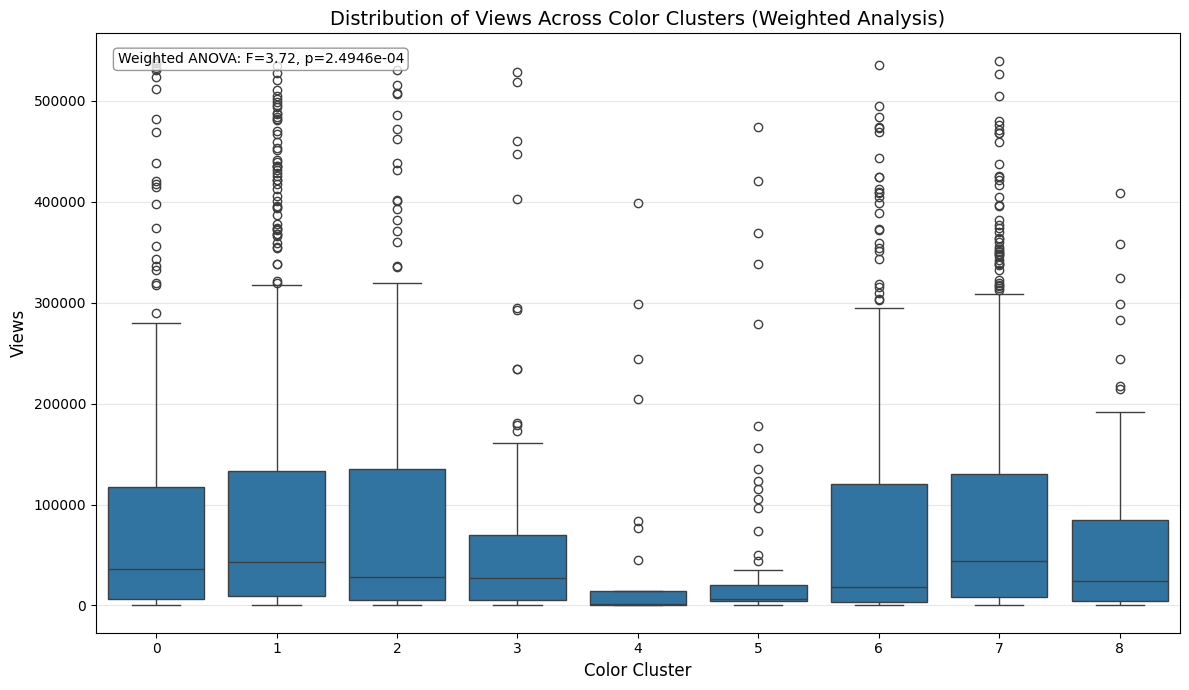

In [60]:
# Create boxplot for Views distribution by Cluster (outliers removed)
plt.figure(figsize=(12, 7))

# Create the boxplot
sns.boxplot(x='Cluster', y='View Count', data=clean_data['View Count'])

# Style the plot
plt.title('Distribution of Views Across Color Clusters (Weighted Analysis)', fontsize=14)
plt.xlabel('Color Cluster', fontsize=12)
plt.ylabel('Views', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add annotation with weighted ANOVA result
plt.annotate(f'Weighted ANOVA: F={anova_result_views.statistic:.2f}, p={anova_result_views.pvalue:.4e}', 
            xy=(0.02, 0.95), xycoords='axes fraction', 
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Calculate and print statistics for each cluster
print("\nWeighted Boxplot Statistics for Each Cluster:")
print("-------------------------------------------")
for cluster in sorted(clean_data['View Count']['Cluster'].unique()):
    cluster_data = clean_data['View Count'][clean_data['View Count']['Cluster'] == cluster]
    
    print(f"\nCluster {cluster}")
    print(f"Min: {cluster_data['View Count'].min():,.0f}")
    print(f"Max: {cluster_data['View Count'].max():,.0f}")
    print(f"Median: {cluster_data['View Count'].median():,.0f}")
    print(f"Q1 (25%): {cluster_data['View Count'].quantile(0.25):,.0f}")
    print(f"Q3 (75%): {cluster_data['View Count'].quantile(0.75):,.0f}")
    print(f"Mean: {cluster_data['View Count'].mean():,.0f}")
    print(f"Weighted Mean: {np.average(cluster_data['View Count'], weights=cluster_data['Channel_Weight']):,.0f}")
    print(f"Standard Deviation: {cluster_data['View Count'].std():,.0f}")
    print(f"Number of videos: {len(cluster_data)}")
    print(f"Average channel weight: {cluster_data['Channel_Weight'].mean():.4f}")

plt.tight_layout()
plt.show()

Perform ANOVA on Like Count

In [63]:
# Perform ANOVA test on Like Count (with outliers removed)
anova_result_likes = f_oneway(*likes_by_Cluster)

# Print results
print("## Weighted ANOVA Results for Likes ##")
print(f"ANOVA F-statistic: {anova_result_likes.statistic:.4f}")
print(f"p-value: {anova_result_likes.pvalue:.4e}")

# Calculate weighted means for each cluster
weighted_means = []
for i, cluster_data in enumerate(likes_by_Cluster):
    cluster_df = clean_data['Like Count'][clean_data['Like Count']['Cluster'] == i]
    weighted_mean = np.average(cluster_data, weights=cluster_df['Channel_Weight'])
    weighted_means.append(weighted_mean)
    print(f"\nCluster {i}:")
    print(f"  Weighted mean likes: {weighted_mean:,.0f}")
    print(f"  Number of videos: {len(cluster_data)}")

# Interpretation
alpha = 0.05
if anova_result_likes.pvalue < alpha:
    print(f"\nRESULT: There are statistically significant differences in Like Count between color Clusters (p < {alpha}).")
    print("This suggests that the weighted like counts differ significantly across clusters.")
else:
    print(f"\nRESULT: No significant differences in Like Count between color Clusters (p > {alpha}).")
    print("This suggests that the weighted like counts are similar across clusters.")

## Weighted ANOVA Results for Likes ##
ANOVA F-statistic: 3.2958
p-value: 9.5238e-04

Cluster 0:
  Weighted mean likes: 2,615
  Number of videos: 221

Cluster 1:
  Weighted mean likes: 2,417
  Number of videos: 738

Cluster 2:
  Weighted mean likes: 2,226
  Number of videos: 234

Cluster 3:
  Weighted mean likes: 2,364
  Number of videos: 95

Cluster 4:
  Weighted mean likes: 1,636
  Number of videos: 34

Cluster 5:
  Weighted mean likes: 1,535
  Number of videos: 88

Cluster 6:
  Weighted mean likes: 2,284
  Number of videos: 275

Cluster 7:
  Weighted mean likes: 2,130
  Number of videos: 462

Cluster 8:
  Weighted mean likes: 1,959
  Number of videos: 109

RESULT: There are statistically significant differences in Like Count between color Clusters (p < 0.05).
This suggests that the weighted like counts differ significantly across clusters.



Weighted Boxplot Statistics for Each Cluster:
-------------------------------------------

Cluster 0
Min: 0
Max: 16,375
Median: 1,293
Q1 (25%): 237
Q3 (75%): 4,662
Mean: 3,176
Weighted Mean: 2,615
Standard Deviation: 4,126
Number of videos: 221
Average channel weight: 0.0006

Cluster 1
Min: 0
Max: 16,857
Median: 1,712
Q1 (25%): 413
Q3 (75%): 4,780
Mean: 3,314
Weighted Mean: 2,417
Standard Deviation: 3,916
Number of videos: 738
Average channel weight: 0.0007

Cluster 2
Min: 0
Max: 16,458
Median: 1,108
Q1 (25%): 123
Q3 (75%): 3,434
Mean: 2,680
Weighted Mean: 2,226
Standard Deviation: 3,762
Number of videos: 234
Average channel weight: 0.0008

Cluster 3
Min: 0
Max: 15,098
Median: 804
Q1 (25%): 247
Q3 (75%): 2,832
Mean: 2,519
Weighted Mean: 2,364
Standard Deviation: 3,429
Number of videos: 95
Average channel weight: 0.0008

Cluster 4
Min: 10
Max: 10,556
Median: 78
Q1 (25%): 26
Q3 (75%): 425
Mean: 1,696
Weighted Mean: 1,636
Standard Deviation: 3,249
Number of videos: 34
Average channel wei

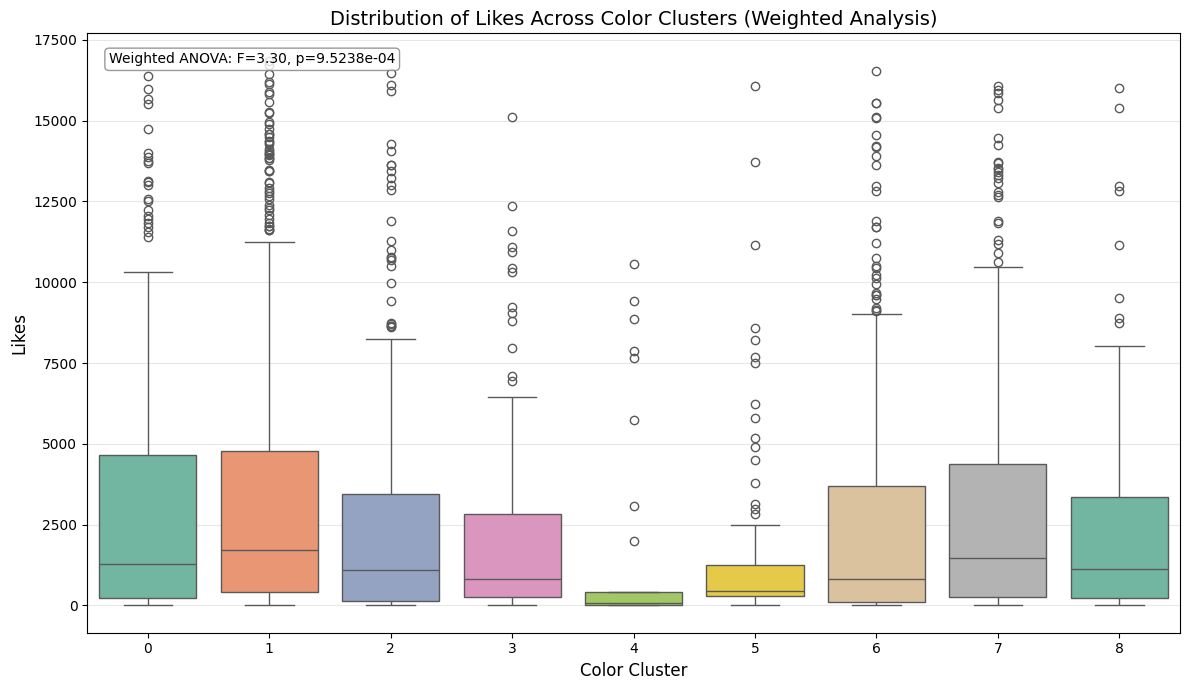

In [64]:
# Create boxplot for Likes distribution by Cluster (outliers removed)
plt.figure(figsize=(12, 7))

# Create the boxplot
sns.boxplot(x='Cluster', y='Like Count', data=clean_data['Like Count'], palette='Set2')

# Style the plot
plt.title('Distribution of Likes Across Color Clusters (Weighted Analysis)', fontsize=14)
plt.xlabel('Color Cluster', fontsize=12)
plt.ylabel('Likes', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add annotation with weighted ANOVA result
plt.annotate(f'Weighted ANOVA: F={anova_result_likes.statistic:.2f}, p={anova_result_likes.pvalue:.4e}', 
            xy=(0.02, 0.95), xycoords='axes fraction', 
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Calculate and print statistics for each cluster
print("\nWeighted Boxplot Statistics for Each Cluster:")
print("-------------------------------------------")
for cluster in sorted(clean_data['Like Count']['Cluster'].unique()):
    cluster_data = clean_data['Like Count'][clean_data['Like Count']['Cluster'] == cluster]
    
    print(f"\nCluster {cluster}")
    print(f"Min: {cluster_data['Like Count'].min():,.0f}")
    print(f"Max: {cluster_data['Like Count'].max():,.0f}")
    print(f"Median: {cluster_data['Like Count'].median():,.0f}")
    print(f"Q1 (25%): {cluster_data['Like Count'].quantile(0.25):,.0f}")
    print(f"Q3 (75%): {cluster_data['Like Count'].quantile(0.75):,.0f}")
    print(f"Mean: {cluster_data['Like Count'].mean():,.0f}")
    print(f"Weighted Mean: {np.average(cluster_data['Like Count'], weights=cluster_data['Channel_Weight']):,.0f}")
    print(f"Standard Deviation: {cluster_data['Like Count'].std():,.0f}")
    print(f"Number of videos: {len(cluster_data)}")
    print(f"Average channel weight: {cluster_data['Channel_Weight'].mean():.4f}")

plt.tight_layout()
plt.show()

Perform ANOVA in Comment Count

In [65]:
# Perform ANOVA test on Comment Count (with outliers removed)
anova_result_comments = f_oneway(*comments_by_Cluster)

# Print results
print("## Weighted ANOVA Results for Comments ##")
print(f"ANOVA F-statistic: {anova_result_comments.statistic:.4f}")
print(f"p-value: {anova_result_comments.pvalue:.4e}")

# Calculate weighted means for each cluster
weighted_means = []
for i, cluster_data in enumerate(comments_by_Cluster):
    cluster_df = clean_data['Comment Count'][clean_data['Comment Count']['Cluster'] == i]
    weighted_mean = np.average(cluster_data, weights=cluster_df['Channel_Weight'])
    weighted_means.append(weighted_mean)
    print(f"\nCluster {i}:")
    print(f"  Weighted mean comments: {weighted_mean:,.0f}")
    print(f"  Number of videos: {len(cluster_data)}")

# Interpretation
alpha = 0.05
if anova_result_comments.pvalue < alpha:
    print(f"\nRESULT: There are statistically significant differences in Comment Count between color Clusters (p < {alpha}).")
    print("This suggests that the weighted comment counts differ significantly across clusters.")
else:
    print(f"\nRESULT: No significant differences in Comment Count between color Clusters (p > {alpha}).")
    print("This suggests that the weighted comment counts are similar across clusters.")

## Weighted ANOVA Results for Comments ##
ANOVA F-statistic: 3.1132
p-value: 1.6800e-03

Cluster 0:
  Weighted mean comments: 239
  Number of videos: 223

Cluster 1:
  Weighted mean comments: 215
  Number of videos: 715

Cluster 2:
  Weighted mean comments: 202
  Number of videos: 226

Cluster 3:
  Weighted mean comments: 220
  Number of videos: 94

Cluster 4:
  Weighted mean comments: 191
  Number of videos: 34

Cluster 5:
  Weighted mean comments: 119
  Number of videos: 89

Cluster 6:
  Weighted mean comments: 201
  Number of videos: 281

Cluster 7:
  Weighted mean comments: 206
  Number of videos: 464

Cluster 8:
  Weighted mean comments: 189
  Number of videos: 106

RESULT: There are statistically significant differences in Comment Count between color Clusters (p < 0.05).
This suggests that the weighted comment counts differ significantly across clusters.



Weighted Boxplot Statistics for Each Cluster:
-------------------------------------------

Cluster 0
Min: 0
Max: 1,299
Median: 119
Q1 (25%): 30
Q3 (75%): 392
Mean: 269
Weighted Mean: 239
Standard Deviation: 320
Number of videos: 223
Average channel weight: 0.0006

Cluster 1
Min: 0
Max: 1,328
Median: 163
Q1 (25%): 47
Q3 (75%): 352
Mean: 261
Weighted Mean: 215
Standard Deviation: 289
Number of videos: 715
Average channel weight: 0.0007

Cluster 2
Min: 0
Max: 1,320
Median: 118
Q1 (25%): 32
Q3 (75%): 334
Mean: 229
Weighted Mean: 202
Standard Deviation: 275
Number of videos: 226
Average channel weight: 0.0008

Cluster 3
Min: 0
Max: 1,188
Median: 104
Q1 (25%): 43
Q3 (75%): 251
Mean: 230
Weighted Mean: 220
Standard Deviation: 292
Number of videos: 94
Average channel weight: 0.0008

Cluster 4
Min: 1
Max: 1,196
Median: 20
Q1 (25%): 12
Q3 (75%): 103
Mean: 129
Weighted Mean: 191
Standard Deviation: 252
Number of videos: 34
Average channel weight: 0.0007

Cluster 5
Min: 0
Max: 918
Median: 70
Q1 (

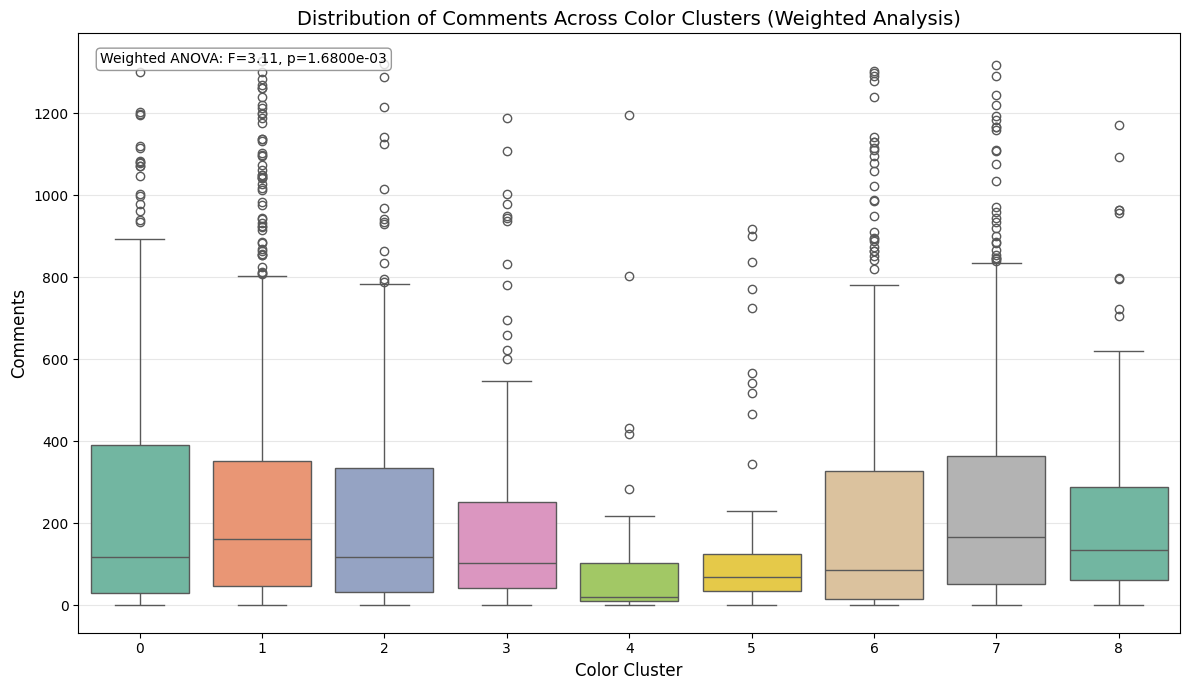

In [66]:
# Create boxplot for Comments distribution by Cluster (outliers removed)
plt.figure(figsize=(12, 7))

# Create the boxplot
sns.boxplot(x='Cluster', y='Comment Count', data=clean_data['Comment Count'], palette='Set2')

# Style the plot
plt.title('Distribution of Comments Across Color Clusters (Weighted Analysis)', fontsize=14)
plt.xlabel('Color Cluster', fontsize=12)
plt.ylabel('Comments', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add annotation with weighted ANOVA result
plt.annotate(f'Weighted ANOVA: F={anova_result_comments.statistic:.2f}, p={anova_result_comments.pvalue:.4e}', 
            xy=(0.02, 0.95), xycoords='axes fraction', 
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Calculate and print statistics for each cluster
print("\nWeighted Boxplot Statistics for Each Cluster:")
print("-------------------------------------------")
for cluster in sorted(clean_data['Comment Count']['Cluster'].unique()):
    cluster_data = clean_data['Comment Count'][clean_data['Comment Count']['Cluster'] == cluster]
    
    print(f"\nCluster {cluster}")
    print(f"Min: {cluster_data['Comment Count'].min():,.0f}")
    print(f"Max: {cluster_data['Comment Count'].max():,.0f}")
    print(f"Median: {cluster_data['Comment Count'].median():,.0f}")
    print(f"Q1 (25%): {cluster_data['Comment Count'].quantile(0.25):,.0f}")
    print(f"Q3 (75%): {cluster_data['Comment Count'].quantile(0.75):,.0f}")
    print(f"Mean: {cluster_data['Comment Count'].mean():,.0f}")
    print(f"Weighted Mean: {np.average(cluster_data['Comment Count'], weights=cluster_data['Channel_Weight']):,.0f}")
    print(f"Standard Deviation: {cluster_data['Comment Count'].std():,.0f}")
    print(f"Number of videos: {len(cluster_data)}")
    print(f"Average channel weight: {cluster_data['Channel_Weight'].mean():.4f}")

plt.tight_layout()
plt.show()